# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S3 E10 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>

**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
 This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>


**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.
•
A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Useful information</p>
### <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#2C3FD6; font-size:130%; text-align:left;padding: 0px;"><strong>Data information</strong>
**🟦EN**:
Based on Integrated Profile of Observation
* ```Mean_Integrated```: Mean of Observations
* ```SD```: Standard deviation of Observations
* ```EK```: Excess kurtosis of Observations
* ```Skewness``` In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Skewness of Observations.
* ```Mean _ DMSNR _ Curve```: Mean of DM SNR CURVE of Observations
* ```SD _ DMSNR _ Curve```: Standard deviation of DM SNR CURVE of Observations
* ```EK _ DMSNR _ Curve```: Excess kurtosis of DM SNR CURVE of Observations
* ```Skewness _ DMSNR _ Curve```: Skewness of DM SNR CURVE of Observations
* ```Class```: Class 0 - 1

**WHAT IS DM SNR CURVE:**

Radio waves emitted from pulsars reach earth after traveling long distances in space which is filled with free electrons. The important point is that pulsars emit a wide range of frequencies, and the amount by which the electrons slow down the wave depends on the frequency. Waves with higher frequency are sowed down less as compared to waves with higher frequency. It means dispersion.

TARGET:

Class
**0** -- It is not
**1** -- It is

**🟥ES**: 
Basado en el Perfil Integrado de Observación

* ```Mean_Integrated```: Media de Observaciones
* ```SD```: Desviación estándar de las observaciones
* ```EK```: Exceso de curtosis de las observaciones
* ```Skewness```: En teoría de la probabilidad y estadística, la asimetría es una medida de la asimetría de la distribución de probabilidad de una variable aleatoria de valor real en torno a su media. Asimetría de Observaciones.
* ```Mean _ DMSNR _ Curve```: Media de la CURVA DM SNR de las observaciones.
* ```SD _ DMSNR _ Curve```: Desviación estándar de la curva DM SNR de las observaciones
* ```EK _ DMSNR _ Curve```: Curva de exceso de curtosis de DM SNR de las observaciones
* ```Skewness _ DMSNR _ Curve```: Curva de asimetría de la curva DM SNR de las observaciones
* ```Class```: Clase 0 - 1

**QUÉ ES LA CURVA DM SNR:**

Las ondas de radio emitidas por los púlsares llegan a la Tierra tras recorrer largas distancias en el espacio, que está lleno de electrones libres. Lo importante es que los púlsares emiten una amplia gama de frecuencias, y la cantidad en que los electrones frenan la onda depende de la frecuencia. Las ondas de frecuencia más alta se frenan menos que las ondas de frecuencia más alta. Esto significa dispersión.

OBJETIVO:

Clase
**0** -- No es
**1** -- Es



## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Libraries</p>

In [1]:
import os 
import sys
import math
import time
import torch
import random
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import optuna.integration.lightgbm as lgbo

from tqdm.auto import tqdm
from sklearn import ensemble
from sklearn import model_selection
from sklearn.metrics import log_loss
from xgboost.callback import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

tqdm.pandas()
warnings.filterwarnings('ignore')

In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL

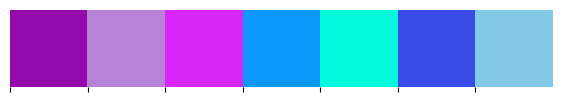

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = ["#cfe6ff", "#a085f2"]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]

sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/playground-series-s3e10"
TRAIN_FILENAME = "train.csv"
TEST_FILENAME = "test.csv"
SUBMISSION_FILENAME = "sample_submission.csv"

# Data dir
TEST_DIR = os.path.join(PATH, TEST_FILENAME)
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME)
SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)
ORIGINAL_DIR = "/kaggle/input/pulsar-classification-for-class-prediction/Pulsar.csv"

In [5]:
ID = "id"
MEAN_INTEGRATED = "Mean_Integrated"
SD = "SD"
EK = "EK"
SKEWNESS = "Skewness"
MEAN_DMSNR_CURVE = "Mean_DMSNR_Curve"
SD_DMSNR_CURVE = "SD_DMSNR_Curve"
EK_DMSNR_CURVE = "EK_DMSNR_Curve"
SKEWNESS_DMSNR_CURVE = "Skewness_DMSNR_Curve"
TARGET = "Class"

In [6]:
CATEGORICAL_COLS = []
NUM_COLS = [MEAN_INTEGRATED,SD,EK,SKEWNESS,MEAN_DMSNR_CURVE,SD_DMSNR_CURVE,EK_DMSNR_CURVE,SKEWNESS_DMSNR_CURVE]
ORDINAL_COLS = []

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [7]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    plt.show()

In [8]:
def plot_cont(col, ax, color=PALETTE_7[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query('set=="train"'),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

In [9]:
def plot_cont_dot(
    df, column, target, ax,
    show_yticks=False, color=PALETTE_7[0]
):

    bins = pd.cut(df[column], bins=n_bins)
    bins = pd.IntervalIndex(bins)
    bins = (bins.left + bins.right) / 2
    target = df[target]
    target = target.groupby(bins).mean()
    target.plot(
        ax=ax, linestyle="",
        marker=".", color=color,
        label=f"Mean {target.name}"
    )
    ax.grid(visible=False)
    
    if not show_yticks:
        ax.get_yaxis().set_ticks([])
        
    return ax

In [10]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [11]:
## Boolean values only
def pie_plot(df: pd.DataFrame, hover_temp: str = "Status: ",
            feature=TARGET, palette=[LIGTH_BLUE,"#221e8f"], color=[BLUE ,DARK_BLUE],
            title="Target distribution"):
#     df[feature] = df[feature].replace({0: "Not cancelled ", 1: "Cancelled"})
    target = df[[feature]].value_counts(normalize=True).sort_index().round(decimals=3)*100
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                        sort=False, showlegend=True, marker=dict(colors=color, line=dict(color=palette,width=2)),
                        hovertemplate = "%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title, 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=600)
    fig.show()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [12]:
train_df = pd.read_csv(TRAIN_DIR)
test_df = pd.read_csv(TEST_DIR)
submission_df = pd.read_csv(SUBMISSION_DIR)
original_df = pd.read_csv(ORIGINAL_DIR)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

In [13]:
data_description(train_df)
data_description(test_df)
data_description(original_df)
data_description(submission_df)

Data description
Total number of records 117564
number of features 10


                   Name     Type  Unique levels  Missing
0                    id    int64         117564        0
1       Mean_Integrated  float64          11065        0
2                    SD  float64          49262        0
3                    EK  float64          37132        0
4              Skewness  float64          41366        0
5      Mean_DMSNR_Curve  float64          12474        0
6        SD_DMSNR_Curve  float64          48050        0
7        EK_DMSNR_Curve  float64          42870        0
8  Skewness_DMSNR_Curve  float64          50648        0
9                 Class    int64              2        0
Data description
Total number of records 78377
number of features 9


                   Name     Type  Unique levels  Missing
0                    id    int64          78377        0
1       Mean_Integrated  float64          10063        0
2                    SD  float64          37058        0
3  

In [14]:
train_df.columns.values

array(['id', 'Mean_Integrated', 'SD', 'EK', 'Skewness',
       'Mean_DMSNR_Curve', 'SD_DMSNR_Curve', 'EK_DMSNR_Curve',
       'Skewness_DMSNR_Curve', 'Class'], dtype=object)

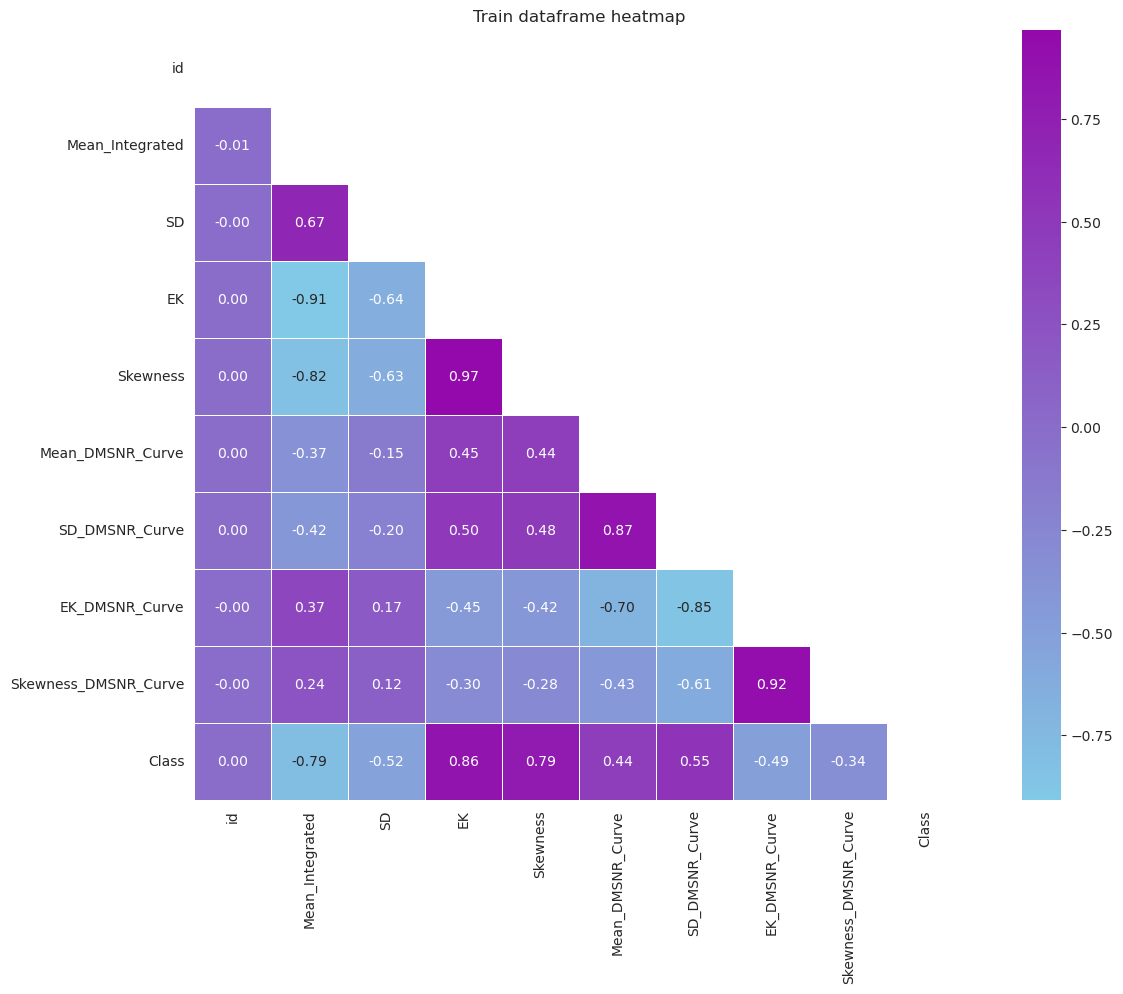

None

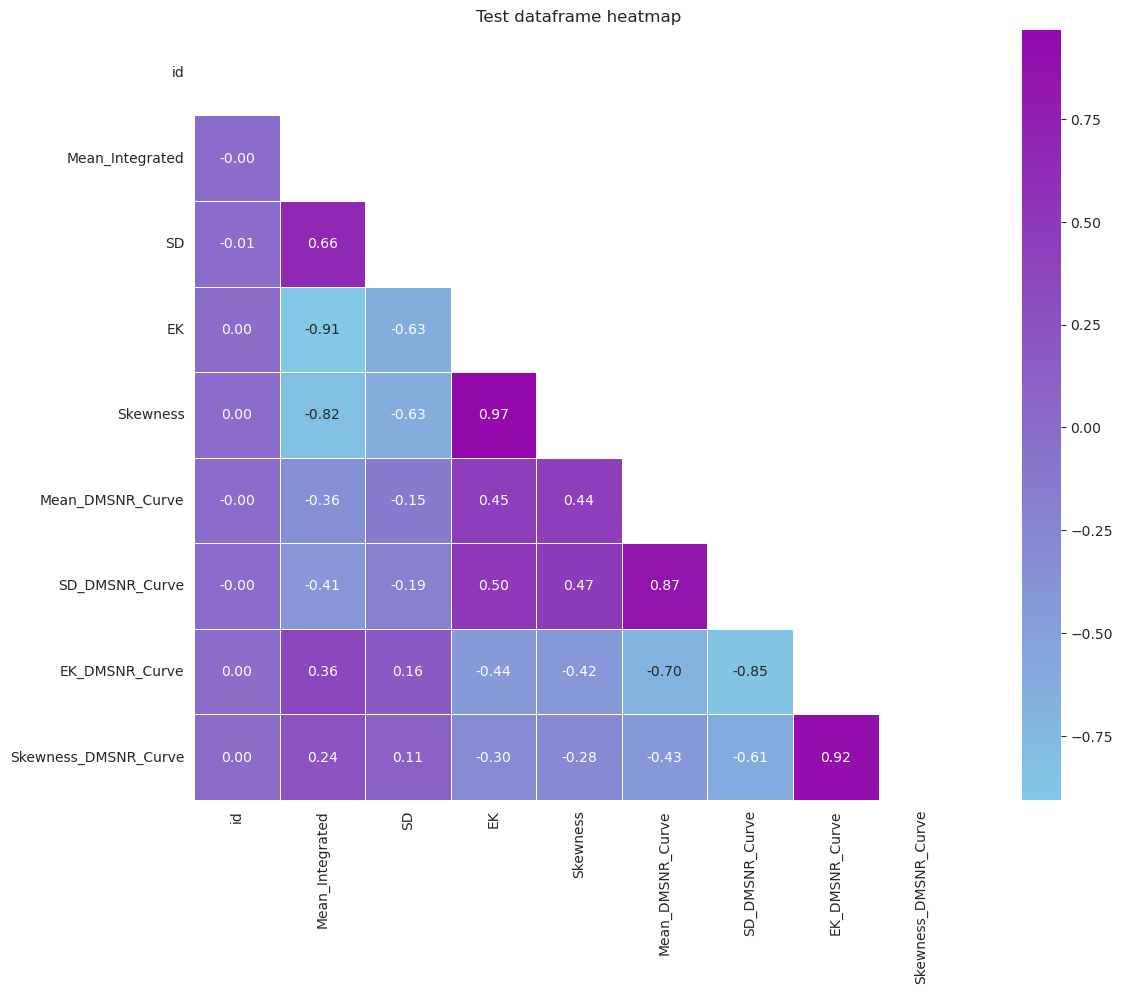

None

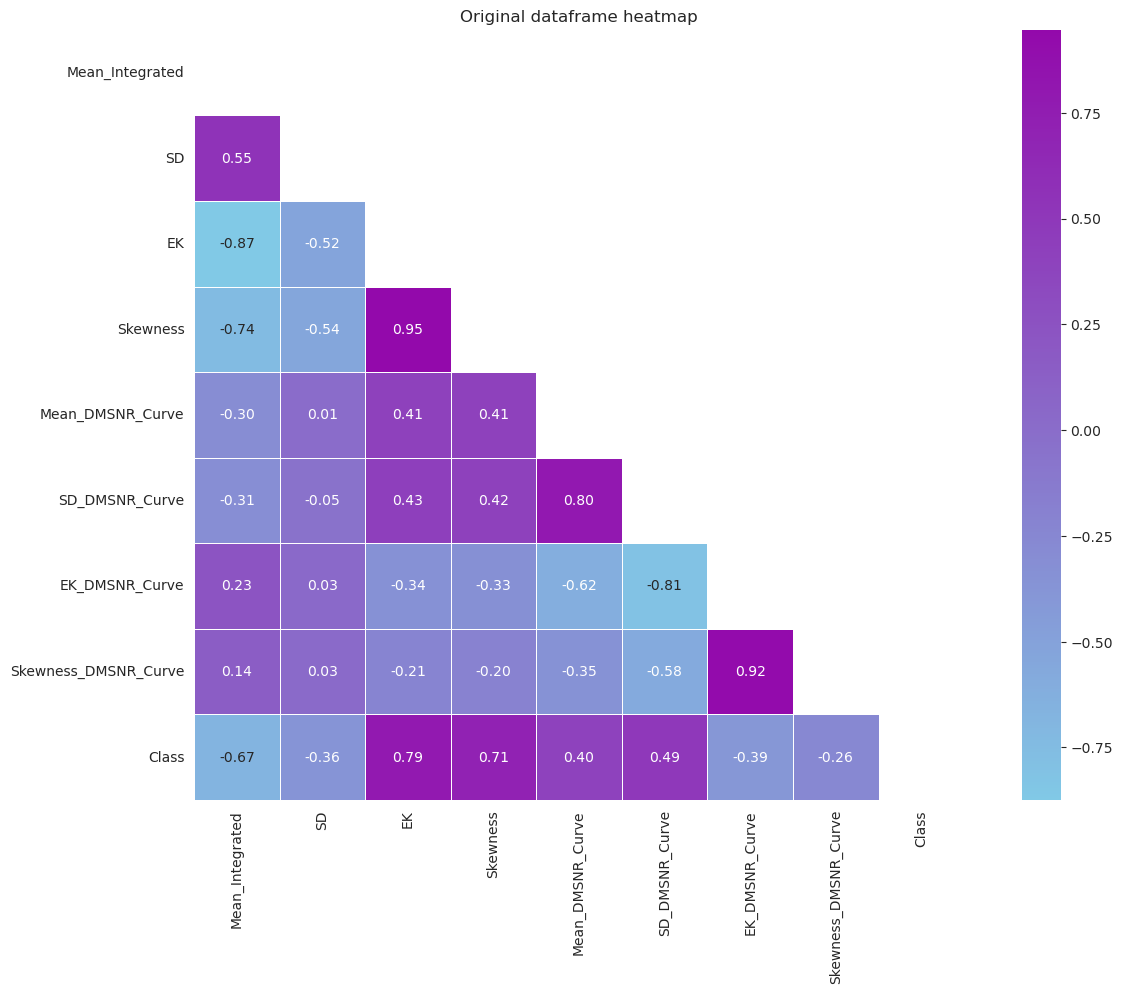

None

In [15]:
display(show_corr_heatmap(train_df, "Train dataframe heatmap"))
display(show_corr_heatmap(test_df, "Test dataframe heatmap"))
display(show_corr_heatmap(original_df, "Original dataframe heatmap"))

In [16]:
labels = ["train", "test", "original"]

In [17]:
# plt.figure(figsize=(9,5))
# sns.kdeplot(data=train_df, x=TARGET,
#             label=labels[0], color=PALETTE_3[1],
#             fill=True)
# sns.kdeplot(data=original_df, x=TARGET,
#             label=labels[2], color=PALETTE_3[2],
#             fill=True)
# plt.title("Target distribution")
# plt.legend()

In [18]:
display(pie_plot(df = train_df, hover_temp = "Class", title="Target distribution PS train dataframe"))
display(pie_plot(df = original_df, hover_temp = "Class", title="Target distribution PS Original dataframe",
                 palette=[PALETTE_7_C[4], PALETTE_7_C[3]], color=[PALETTE_7_C[0], PALETTE_7_C[2]]))

None

None

In [19]:
comb_df = pd.concat([
    train_df.assign(set=labels[0]),
    test_df.assign(set=labels[1]),
    original_df.assign(set=labels[2]),
])
comb_df.reset_index(inplace=True)

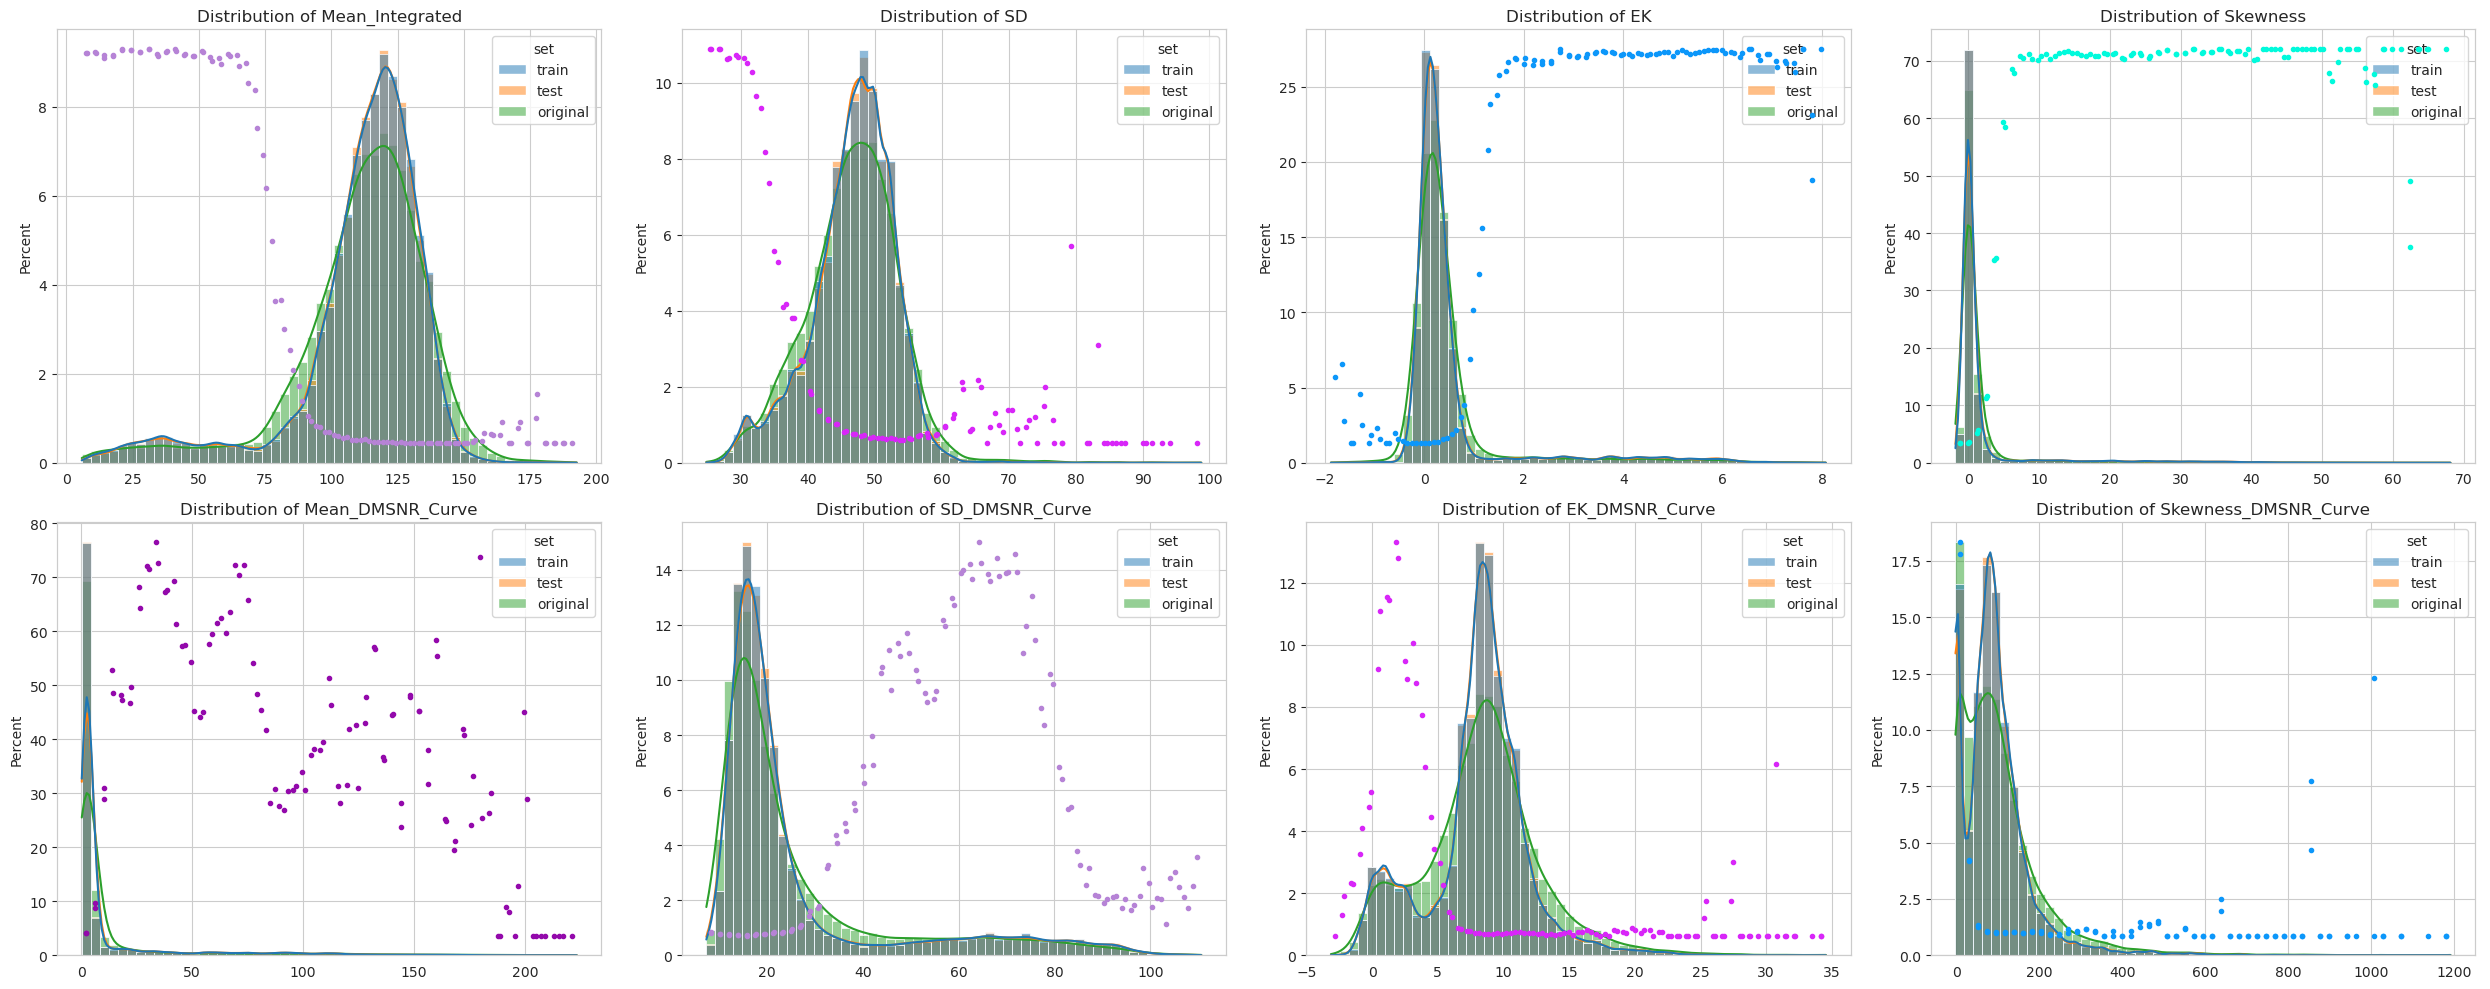

In [20]:
x = 0
n_bins = 55
histplot_hyperparams = {
    "kde":True,
    "alpha":0.5,
    "stat":"percent",
    "bins":n_bins
}
line_style='-'

columns =  ORDINAL_COLS + NUM_COLS
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(25, n_rows*5))
ax = ax.flatten()

for i, column in enumerate(columns):
    if x == 4:
        x = 0
    else:
        x = x + 1
    plot_axes = [ax[i]]
    
    if column in ORDINAL_COLS:
        plot_ordinals(column, ax[i], PALETTE_7[x])
    else:
        plot_cont(column, ax[i], PALETTE_7[x])

    # titles
    ax[i].set_title(f"Distribution of {column}");
    ax[i].set_xlabel(None)
    
for i in range(i+1, len(ax)):
    ax[i].axis("off")

plt.tight_layout()

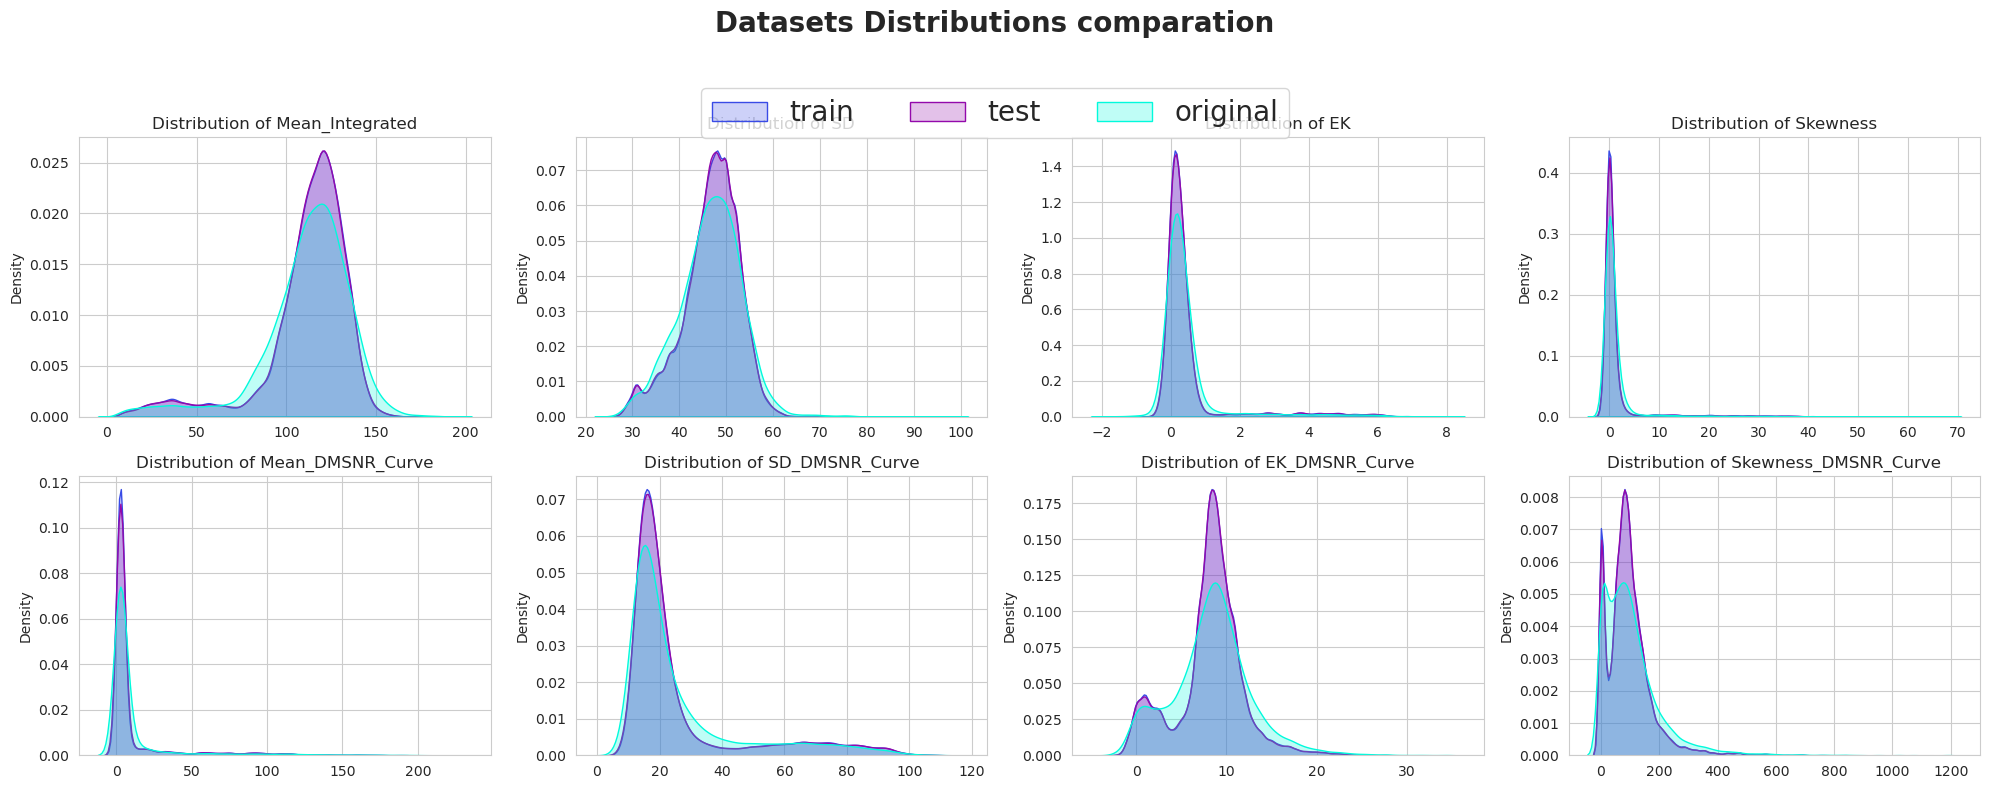

In [21]:
columns = test_df.columns
columns = columns.drop(ID)
n_cols = 4
n_rows = math.ceil(len(columns)/n_cols)
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
ax = ax.flatten()

for i, column in enumerate(columns):
    plot_axes = [ax[i]]
          
    sns.kdeplot(
        train_df[column], label="Train PS dataframe",
        ax=ax[i], color=PALETTE_7[5], fill=True
    )

    sns.kdeplot(
        test_df[column], label="Test PS datafraem",
        ax=ax[i], color=PALETTE_7_C[0], fill=True
    )
    
    sns.kdeplot(
        original_df[column], label="Original train dataframe",
        ax=ax[i], color=PALETTE_7_C[3], fill=True
    )
    
#     sns.kdeplot(
#         test_or_df[column], label="Original test dataframe",
#         ax=ax[i], color=SEC_PALETTE[1]
#     )
    

    
    # titles
    ax[i].set_title(f"Distribution of {column}");
    ax[i].set_xlabel(None)
    
    plot_axes = [ax[i]]
    handles = []
    for plot_ax in plot_axes:
        handles += plot_ax.get_legend_handles_labels()[0]
        plot_ax.legend().remove()
    
for i in range(i+1, len(ax)):
    ax[i].axis("off")
    
fig.suptitle(f"Datasets Distributions comparation\n\n", fontsize=20, ha="center", fontweight="bold")
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 0.9), fontsize=20, ncol=4)
plt.tight_layout()

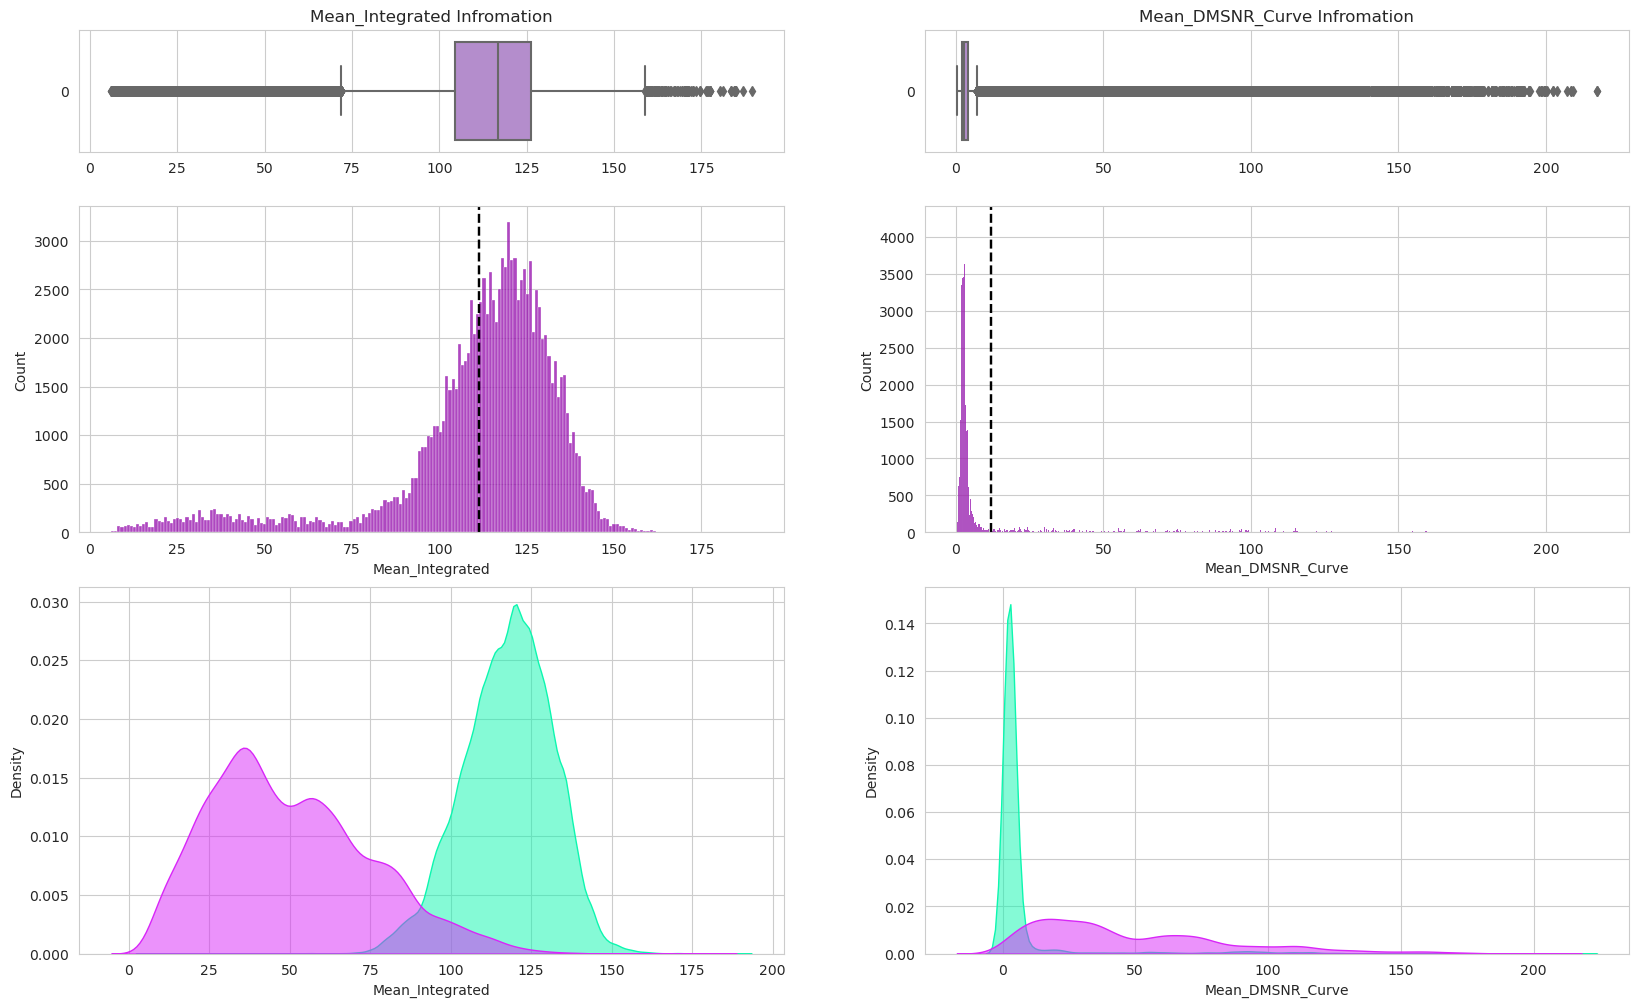

In [22]:
f, ((ax_box, ax_box1),(ax_hist,ax_hist1),(ax_kde,ax_kde1)) = plt.subplots(3,2, gridspec_kw={"height_ratios": (.15, .4, .45)}, figsize=(20, 12))

#title
ax_box.title.set_text('Mean_Integrated Infromation')

sns.kdeplot(train_df[train_df[TARGET] == 0][MEAN_INTEGRATED], label="C0", fill=True,ax=ax_kde,alpha=0.5, color=PALETTE_3[1])
sns.kdeplot(train_df[train_df[TARGET] == 1][MEAN_INTEGRATED], label="C1", fill=True,ax=ax_kde,alpha=0.5, color=PALETTE_3[2])

sns.boxplot(train_df[MEAN_INTEGRATED], orient="h" ,ax=ax_box, color=PALETTE_7[1])
sns.histplot(data=train_df, x=MEAN_INTEGRATED, ax=ax_hist, color=PALETTE_7[0])
ax_box.set(xlabel='')

ax_box1.title.set_text('Mean_DMSNR_Curve Infromation')

sns.kdeplot(train_df[train_df[TARGET] == 0][MEAN_DMSNR_CURVE], label="C0", fill=True,ax=ax_kde1,alpha=0.5, color=PALETTE_3[1])
sns.kdeplot(train_df[train_df[TARGET] == 1][MEAN_DMSNR_CURVE], label="C1", fill=True,ax=ax_kde1,alpha=0.5, color=PALETTE_3[2])

sns.boxplot(train_df[MEAN_DMSNR_CURVE], orient="h" ,ax=ax_box1, color=PALETTE_7[1])
sns.histplot(data=train_df, x=MEAN_DMSNR_CURVE, ax=ax_hist1, color=PALETTE_7[0])
ax_box1.set(xlabel='')

ax_hist.axvline(train_df[MEAN_INTEGRATED].mean(), linestyle='--', linewidth=1.75,color='black')
ax_hist1.axvline(train_df[MEAN_DMSNR_CURVE].mean(), linestyle='--', linewidth=1.75,color='black')

plt.show()

Text(0.5, 1.0, 'SD / Mean_Integrated')

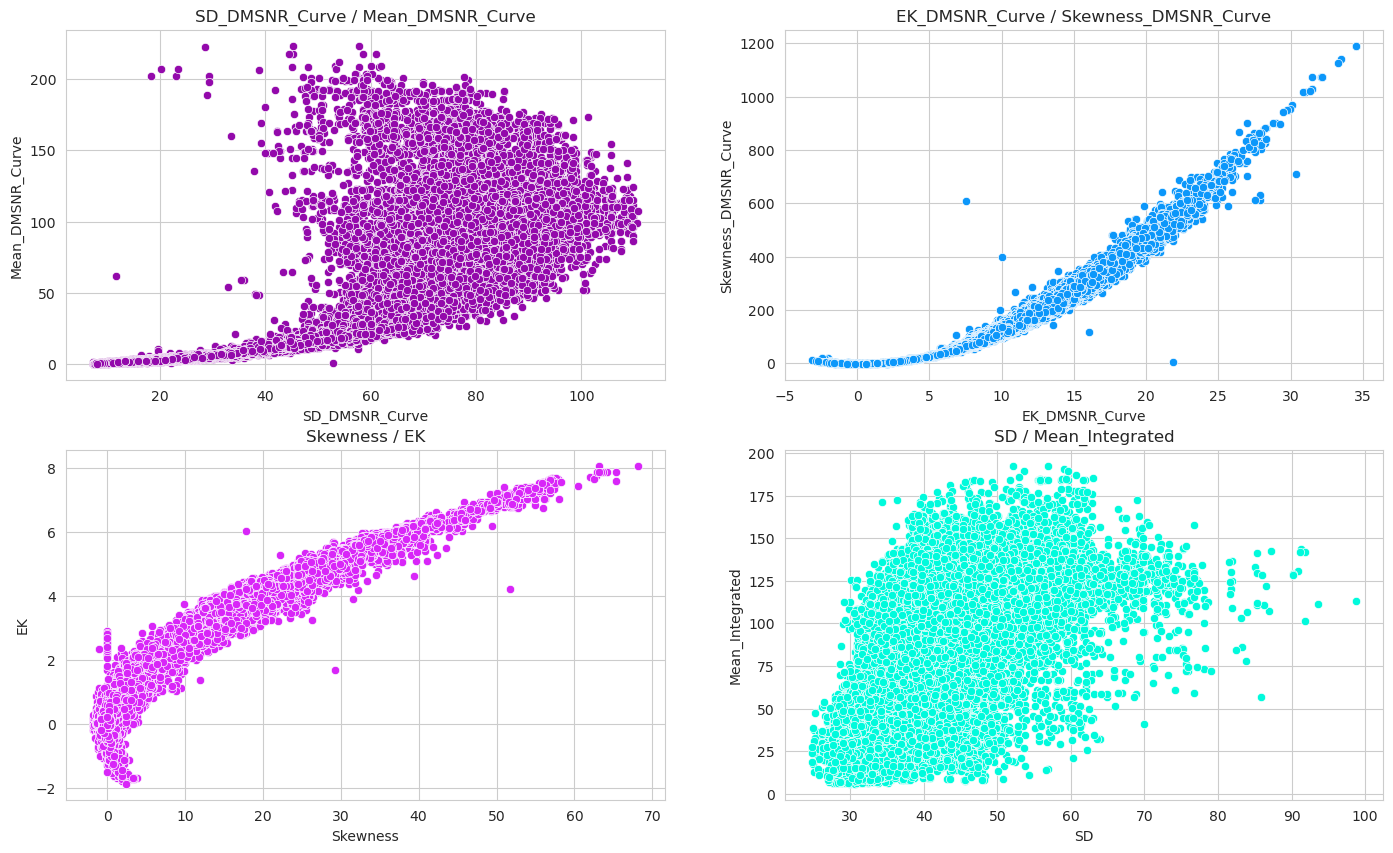

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(17, 10))

sns.scatterplot(ax=ax[0,0], data=comb_df, x=SD_DMSNR_CURVE,y=MEAN_DMSNR_CURVE, color=PALETTE_7_C[0])
ax[0, 0].set_title(f"{SD_DMSNR_CURVE} / {MEAN_DMSNR_CURVE}")
sns.scatterplot(ax=ax[0,1], data=comb_df, x=EK_DMSNR_CURVE,y=SKEWNESS_DMSNR_CURVE, color=PALETTE_7_C[1])
ax[0, 1].set_title(f"{EK_DMSNR_CURVE} / {SKEWNESS_DMSNR_CURVE}")
sns.scatterplot(ax=ax[1,0], data=comb_df, x=SKEWNESS,y=EK, color=PALETTE_7_C[2])
ax[1, 0].set_title(f"{SKEWNESS} / {EK}")
sns.scatterplot(ax=ax[1,1], data=comb_df, x=SD,y=MEAN_INTEGRATED, color=PALETTE_7_C[3])
ax[1, 1].set_title(f"{SD} / {MEAN_INTEGRATED}")

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data preparation and prediction</p>

### <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#A766FA; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #5F06D1"> XGB Model</p>

In [24]:
def get_mean(oof: np.array):
    """oof: ['val_idx', 'preds', 'target']"""
    oof = pd.DataFrame(np.concatenate(oof), columns=['id', 'preds', 'target']).set_index('id')
    oof.index = oof.index.astype(int)
    mean_val_score = log_loss(oof.target, oof.preds)
    return mean_val_score

In [25]:
%%time
config = {
        'SEED': 42,
        'FOLDS': 15,
        'N_ESTIMATORS': 500,
        'COMBINED': False,
        'COL_DROP': [
        ]
    }

xgb_params = {
        'n_jobs': -1,
        'verbosity': 0,
        'max_depth': 4,
        'random_state': 18,
        'learning_rate': 0.2,
        'eval_metric': 'logloss',
        'colsample_bytree': 0.67,
        'early_stopping_rounds': 50,
        'objective': 'binary:logistic',
    }

if config['COMBINED']:
    train_df = pd.concat([train_df, origin_df]).reset_index(drop=True)

X = train_df.drop(TARGET, axis = 1)
y = train_df[TARGET]


cv = model_selection.StratifiedKFold(n_splits=config['FOLDS'], shuffle=True, random_state=config['SEED'])
feature_importances_ = pd.DataFrame(index=test_df.columns)
eval_results_ = {}
models_ = []
oof = []

for fold, (fit_idx, val_idx) in enumerate(cv.split(X, y)):
    if (fold + 1) % 5 == 0 or (fold + 1) == 1:
        print(f"{'-' * 10} FOLD {fold + 1} {'-' * 10}")

    # Split the dataset according to the fold indexes.
    X_train = X.iloc[fit_idx]
    X_val = X.iloc[val_idx]
    y_train = y.iloc[fit_idx]
    y_val = y.iloc[val_idx]

    fit_set = xgb.DMatrix(X_train, y_train)
    val_set = xgb.DMatrix(X_val, y_val)
    watchlist = [(fit_set, 'fit'), (val_set, 'val')]

    # Train
    eval_results_[fold] = {}
    model = xgb.train(
        num_boost_round=config['N_ESTIMATORS'],
        params=xgb_params,
        dtrain=fit_set,
        evals=watchlist,
        evals_result=eval_results_[fold],
        verbose_eval=False,
        callbacks=[
            EarlyStopping(xgb_params['early_stopping_rounds'],
                          data_name='val', save_best=True)],
    )

    val_preds = model.predict(val_set)
    val_score = log_loss(y_val, val_preds)
    best_iter = model.best_iteration

    idx_pred_target = np.vstack([val_idx, val_preds, y_val]).T  # shape(len(val_idx), 3)
    print(f"{cyn}LogLoss{res}: {blue}{val_score:.5f}{res}\t{yllw}Best iteration{res}  :{blue}{best_iter}{res}")

    oof.append(idx_pred_target)

    # Stores the feature importances
    feature_importances_[f"gain_{fold}"] = model.get_score(importance_type="gain").values()
    feature_importances_[f"split_{fold}"] = model.get_score(importance_type="weight").values()

    # Stores the model
    models_.append(model)

mean_val_rmse = get_mean(oof)
print(f"{'#' * 20}\n{red}Mean{res} LogLoss: {red}{mean_val_rmse:.5f}")

---------- FOLD 1 ----------
LogLoss: 0.02543	Best iteration  :63
LogLoss: 0.02603	Best iteration  :108
LogLoss: 0.03591	Best iteration  :68
LogLoss: 0.02926	Best iteration  :115
---------- FOLD 5 ----------
LogLoss: 0.03036	Best iteration  :96
LogLoss: 0.03271	Best iteration  :179
LogLoss: 0.03340	Best iteration  :72
LogLoss: 0.02467	Best iteration  :120
LogLoss: 0.03413	Best iteration  :122
---------- FOLD 10 ----------
LogLoss: 0.03334	Best iteration  :63
LogLoss: 0.03227	Best iteration  :110
LogLoss: 0.03091	Best iteration  :101
LogLoss: 0.03077	Best iteration  :65
LogLoss: 0.03731	Best iteration  :44
---------- FOLD 15 ----------
LogLoss: 0.02945	Best iteration  :107
####################
Mean LogLoss: 0.03106
CPU times: user 5min 12s, sys: 436 ms, total: 5min 12s
Wall time: 2min 36s


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Send prediction</p>

In [26]:
def predict(X):
    y = np.zeros(len(X))
    for model in tqdm(models_):
        y += model.predict(xgb.DMatrix(X))
    return y / len(models_)

predictions = predict(test_df)


  0%|          | 0/15 [00:00<?, ?it/s]

In [27]:
submission_df[TARGET] = predictions
submission_df.to_csv("submission.csv", index=False)
submission_df.head(3)


,id,Class
0,117564,0.000138
1,117565,0.001632
2,117566,0.000181


### The model and data analysis is in process, it will be updated in the next days, if you liked it or if it helped you feel free to leave your upvote.